In [30]:
import pandas as pd
import numpy as np

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris = load_iris()

In [33]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [35]:
iris["target"] # this should be non-sorted. Otherwise, the y_test could not include every possible output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
x = iris.data
y = iris.target

In [37]:
print(type(x))
print(x.shape)
print(x.dtype)

<class 'numpy.ndarray'>
(150, 4)
float64


In [38]:
print(type(y))
print(y.shape)
print(y.dtype)

<class 'numpy.ndarray'>
(150,)
int64


In [39]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

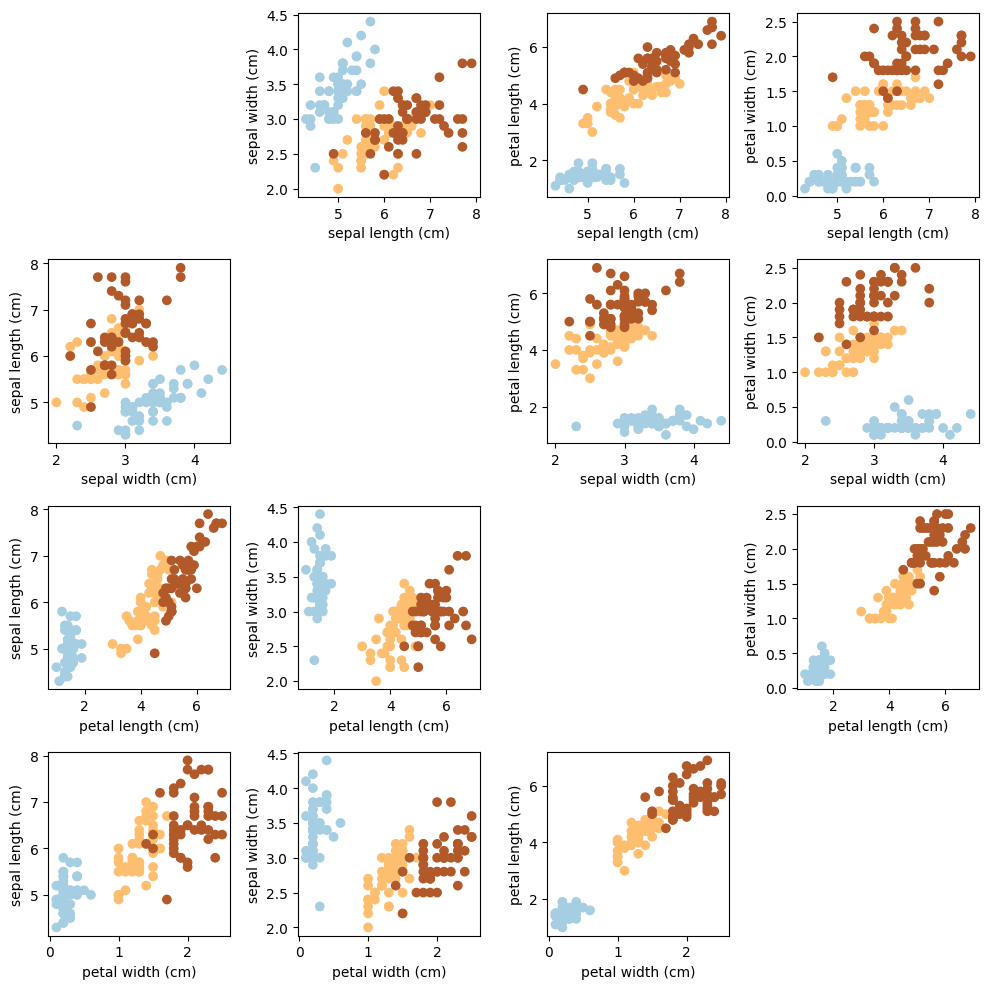

In [40]:
import matplotlib.pyplot as plt

n_features = len(iris.feature_names)
fig, axes = plt.subplots(n_features, n_features, figsize=(10, 10))

for i in range(n_features):
    for j in range(n_features):
        if i != j:
            axes[i, j].scatter(x[:, i], x[:, j], c=y, cmap=plt.cm.Paired)
            axes[i, j].set_xlabel(iris.feature_names[i])
            axes[i, j].set_ylabel(iris.feature_names[j])
        else:
            axes[i, j].axis("off")  # Opcional: ocultar la diagonal

plt.tight_layout()
plt.show()

En lo personal, creo que lo mejor es hacer una relación entre el pétalo y el sépalo. Una de las relaciones más claras es la de "petal_length" y "sepal_length". Por lo tanto, cogeremos esa idea de agrupación para el KNN.

In [41]:
print(f"Indexes chosen: Petal length {iris.feature_names.index('sepal length (cm)')}, "
      f"Sepal length {iris.feature_names.index('petal length (cm)')}")

Indexes chosen: Petal length 0, Sepal length 2


## Creating the KNN Model

In [42]:
from sklearn import neighbors

In [43]:
model = neighbors.KNeighborsClassifier()

## Split data for training and testing

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


In [47]:
pd.unique(Y_test)

array([1, 0, 2])

## Normalising the data and training the model

Remember that you should normalise the data. It is recommended to use:
- MinMax()
- Standarization()
- Robust Scaler(): based on outliers


In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [49]:
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

pipeline1 = Pipeline([("scaler", min_max_scaler), ("model", model)]) 
pipeline2 = Pipeline([("scaler", std_scaler), ("model", model)])
pipeline3 = Pipeline([("scaler", robust_scaler), ("model", model)])

pipes = [pipeline1, pipeline2, pipeline3]

for p in pipes:
    p.fit(X_train, Y_train)

## Predict with the model & check the accuracy

In [50]:
from sklearn import metrics

In [51]:
for p in pipes:
    print(f"---\n{p}")
    y_pred = p.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, y_pred)
    print(accuracy)
    print("---\n")

---
Pipeline(steps=[('scaler', MinMaxScaler()), ('model', KNeighborsClassifier())])
0.32
---

---
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])
0.82
---

---
Pipeline(steps=[('scaler', RobustScaler()), ('model', KNeighborsClassifier())])
0.96
---



# KNN model with cross validation

Generally, we divide the dataset into two subsets: `train` and `test`. With this method, we create **three datasets**.
1. Train - 60%
2. Cross Validation - 20%. Used for obtaining the best possible k.
3. Test - 20%

In [52]:
from sklearn.model_selection import KFold

In [53]:
model = KFold(n_splits=5, shuffle=True, random_state=42)
# shuffle: randomly shuffles the data
# random_state: seed. Makes shuffle reproducible

Now we carry out cross validation, going though 5 folds (n_splits).
In each iteration:
1. Train the model on the training folds
2. Compute predictions
3. Compute accuracy and store it

For each iteration, 4 subsets will be used as train and 1 for test (80-20).

Then, we compute the average and std.

The following code shows a manual representation of what `KFold` does:

In [60]:
scores = []

for train_index, test_index in model.split(x):
    print(f"Train: {train_index[:5]}...", f"Test: {test_index[:5]}")
    X_train, X_test = x[train_index,:], x[test_index,:]
    Y_train, Y_test = y[train_index], y[test_index]

    pipe = Pipeline([
        ("scaler", MinMaxScaler()),
        ("knn", neighbors.KNeighborsClassifier())])

    pipe.fit(X_train, Y_train)

    y_test_pred = pipe.predict(X_test)
    accuracy_knn = metrics.accuracy_score(Y_test, y_test_pred)

    print(f"Accuracy for this iteration is {accuracy_knn}")
    scores.append(accuracy_knn)

scores = np.array(scores)
print(f"\nAccuracies {scores}")
print(f"Average cross validation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

Train: [0 1 2 3 4]... Test: [ 9 12 18 19 26]
Accuracy for this iteration is 1.0
Train: [1 2 3 5 6]... Test: [ 0  4 10 11 15]
Accuracy for this iteration is 0.9666666666666667
Train: [0 1 2 3 4]... Test: [ 5  7 23 24 25]
Accuracy for this iteration is 0.9666666666666667
Train: [0 1 4 5 7]... Test: [ 2  3  6  8 13]
Accuracy for this iteration is 0.9
Train: [0 2 3 4 5]... Test: [ 1 14 20 21 37]
Accuracy for this iteration is 0.9333333333333333

Accuracies [1.         0.96666667 0.96666667 0.9        0.93333333]
Average cross validation accuracy is: 0.95 +- 0.03


---

The following code shows how to use `KFold`

In [63]:
from sklearn.model_selection import cross_val_score, KFold

model = KFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", neighbors.KNeighborsClassifier())])

scores = cross_val_score(pipe, x, y, scoring="accuracy", cv=model)
print(f"\nAccuracies {scores}")
print(f"Average cross validation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")


Accuracies [1.         0.96666667 0.96666667 0.9        0.93333333]
Average cross validation accuracy is: 0.95 +- 0.03


In [64]:
final_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", neighbors.KNeighborsClassifier())])

final_pipe.fit